In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#upload csv file
df=pd.read_csv('kidney_disease.csv')

In [3]:
#information about dataframe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [4]:
#check null values
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [5]:
#check duplicates
df.duplicated().sum()

np.int64(0)

In [6]:
#display file five rows as default
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [7]:
#drop columns id
df=df.drop(columns='id',axis=1)

In [8]:
#describe data
df.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [9]:
#convert columns object to float
text_columns=['pcv', 'wc', 'rc']
for i in text_columns:
    print(f'{i} : {df[i].dtype}')
print("")
def convert_text_to_numeric(df,column):
    df[column]=pd.to_numeric(df[column],errors='coerce')
for column in text_columns:
    convert_text_to_numeric(df,column)
    print(f"{column} : {df[column].dtype}")        

pcv : object
wc : object
rc : object

pcv : float64
wc : float64
rc : float64


In [10]:
#find mean and mode value
def mean_value_imputation(df,column):
    mean_value=df[column].mean()
    df[column].fillna(value=mean_value,inplace=True)
def mode_value_imputation(df,column):
    mode_value=df[column].mode()[0]
    df[column].fillna(value=mode_value,inplace=True)    


In [11]:
#fill mean and mode value as num_column and cat_column
num_column=[col for col in df.columns if df[col].dtype!='object']

for i in num_column:
    mean_value_imputation(df,i)
cat_column=[col for col in df.columns if df[col].dtype=='object']

for i in cat_column:
    mode_value_imputation(df,i)


In [12]:
df.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [13]:
##display unique value in cateogrical columns
print(df['dm'].value_counts())
print(df['cad'].value_counts())
print(df['classification'].value_counts())

dm
no       260
yes      134
\tno       3
\tyes      2
 yes       1
Name: count, dtype: int64
cad
no      364
yes      34
\tno      2
Name: count, dtype: int64
classification
ckd       248
notckd    150
ckd\t       2
Name: count, dtype: int64


In [14]:
#change cateogrical value as right formate
df['dm']=df['dm'].replace(to_replace={' yes':'yes','\tno':'no','\tyes':'yes'})
df['cad']=df['cad'].replace(to_replace={'\tno':'no'})
df['classification']=df['classification'].replace(to_replace={'ckd\t':'ckd'})


In [15]:
cat_column

['rbc',
 'pc',
 'pcc',
 'ba',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

In [16]:
#feature encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['rbc'] = le.fit_transform(df['rbc'])
df['pc'] = le.fit_transform(df['pc'])
df['pcc'] = le.fit_transform(df['pcc'])
df['ba'] = le.fit_transform(df['ba'])
df['htn'] = le.fit_transform(df['htn'])
df['dm'] = le.fit_transform(df['dm'])
df['cad'] = le.fit_transform(df['cad'])
df['appet'] = le.fit_transform(df['appet'])
df['pe'] = le.fit_transform(df['pe'])
df['ane'] = le.fit_transform(df['ane'])
df['classification'] = le.fit_transform(df['classification'])

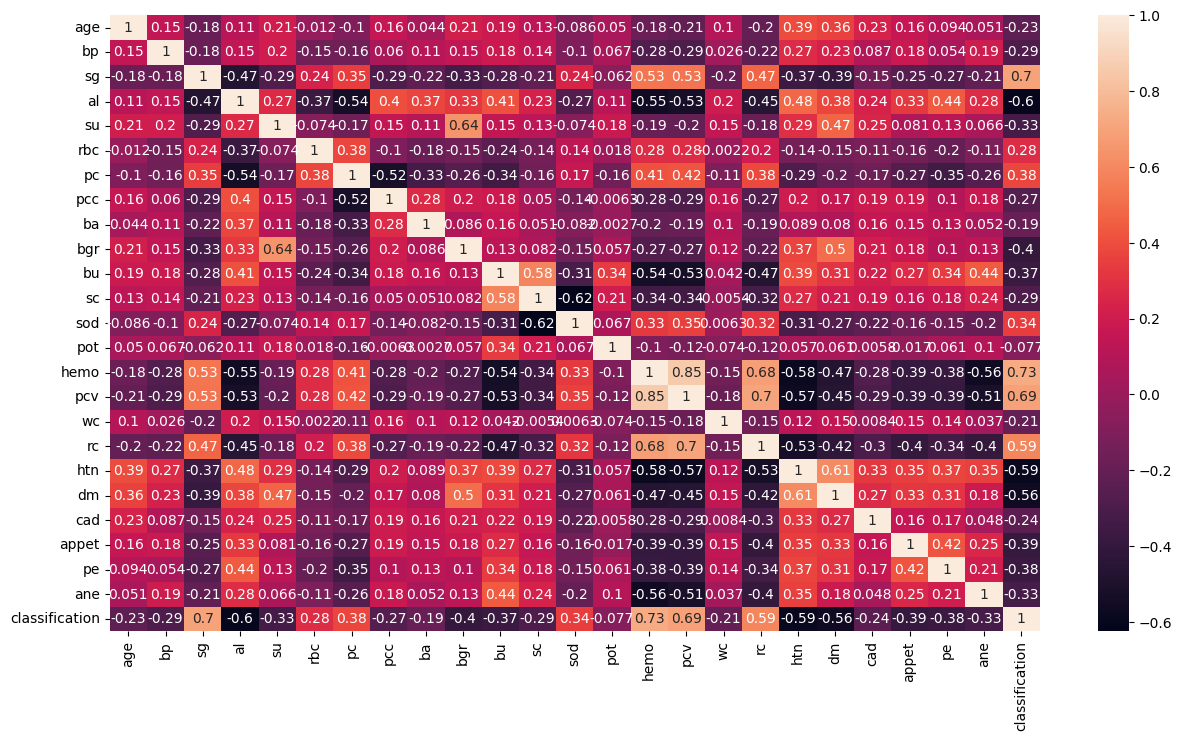

In [17]:
#headmap
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [18]:
target_corr=df.corr()['classification'].abs().sort_values(ascending=[False])[1:]
target_corr

hemo     0.729628
sg       0.698957
pcv      0.690060
al       0.599238
rc       0.590913
htn      0.590438
dm       0.559060
bgr      0.401374
appet    0.393341
pc       0.375154
pe       0.375154
bu       0.372033
sod      0.342288
su       0.327812
ane      0.325396
sc       0.294079
bp       0.290600
rbc      0.282642
pcc      0.265313
cad      0.236088
age      0.225405
wc       0.205274
ba       0.186871
pot      0.076921
Name: classification, dtype: float64

In [19]:
df['classification'].value_counts()

classification
0    250
1    150
Name: count, dtype: int64

In [37]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score



# Features & Target-
x = df.drop(columns=['classification'])
y = df['classification']


# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(x)

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



print("Shape of X_train:", x_train.shape)
print("Shape of X_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
y_pred_lr = lr_model.predict(x_test)

lr_r2 = r2_score(y_test, y_pred_lr)
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_rmse = np.sqrt(lr_mse)

print("\nLinear Regression Results")
print(" ")
print("R2 Score:", lr_r2)
print("Mean Squared Error:", lr_mse)
print("Root Mean Squared Error:", lr_rmse)

Shape of X_train: (320, 24)
Shape of X_test: (80, 24)
Shape of y_train: (320,)
Shape of y_test: (80,)

Linear Regression Results
 
R2 Score: 0.7006669513209733
Mean Squared Error: 0.06809826857447857
Root Mean Squared Error: 0.2609564495744042


In [38]:
# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=200, max_depth=15, random_state=42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)

rf_r2 = r2_score(y_test, y_pred_rf)
rf_mse=mean_squared_error(y_test,y_pred_rf)
rf_rmse=np.sqrt(rf_mse)

print("\nRandom Forest Results")
print(" ")
print("R2 Score:", rf_r2)
print("Mean Squared Error:", rf_mse)
print("Root Mean Squared Error:", rf_rmse)


Random Forest Results
 
R2 Score: 0.9631195054945055
Mean Squared Error: 0.0083903125
Root Mean Squared Error: 0.09159864900750447


In [39]:
# Decision Tree Regressor
dt_model = DecisionTreeRegressor(max_depth=None, random_state=42)
dt_model.fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_test)

dt_r2 = r2_score(y_test, y_pred_dt)
dt_mse=mean_squared_error(y_test,y_pred_dt)
dt_rmse=np.sqrt(dt_mse)

print("\nDecision Tree Results")
print(" ")
print("R2 Score:", dt_r2)
print("Mean Squared Error:", dt_mse)
print("Root Mean Squared Error:", dt_rmse)


Decision Tree Results
 
R2 Score: 0.945054945054945
Mean Squared Error: 0.0125
Root Mean Squared Error: 0.11180339887498948


In [42]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# ANN Model
# -------------------------------
model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # binary classification
])

model.summary()



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │         1,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,713 (14.50 KB)

 Trainable params: 3,713 (14.50 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(x_train, y_train, 
                    epochs=50, 
                    batch_size=16, 
                    validation_data=(x_test, y_test),
                    verbose=1)


# Evaluation

y_pred_ann = (model.predict(x_test) > 0.5).astype("int32")

acc = accuracy_score(y_test, y_pred_ann)
prec = precision_score(y_test, y_pred_ann)
rec = recall_score(y_test, y_pred_ann)
f1 = f1_score(y_test, y_pred_ann)

print("\nANN Results")
print(" ")
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7375 - loss: 0.5888 - val_accuracy: 0.9750 - val_loss: 0.3836
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9344 - loss: 0.3548 - val_accuracy: 0.9875 - val_loss: 0.2178
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9719 - loss: 0.2393 - val_accuracy: 0.9875 - val_loss: 0.1373
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9625 - loss: 0.1718 - val_accuracy: 0.9875 - val_loss: 0.0954
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9750 - loss: 0.1329 - val_accuracy: 0.9750 - val_loss: 0.0733
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9781 - loss: 0.0967 - val_accuracy: 0.9875 - val_loss: 0.0580
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9844 - loss: 0.0774 - val_accuracy: 0.9750 - val_loss: 0.0484
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9906 - loss: 0.0681 - val_accuracy: 0.9875 - val_loss